[nltk_data] Downloading package punkt to C:\Users\Nicolette
[nltk_data]     Mtisi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Nicolette
[nltk_data]     Mtisi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Nicolette
[nltk_data]     Mtisi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset loaded:
                                                text sentiment
0                @VirginAmerica What @dhepburn said.   neutral
1  @VirginAmerica plus you've added commercials t...  positive
2  @VirginAmerica I didn't today... Must mean I n...   neutral
3  @VirginAmerica it's really aggressive to blast...  negative
4  @VirginAmerica and it's a really big bad thing...  negative

Sentiment distribution:
sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

Preprocessed data:
                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                        cleaned_text  
0                                               said  
1       plus youve added co

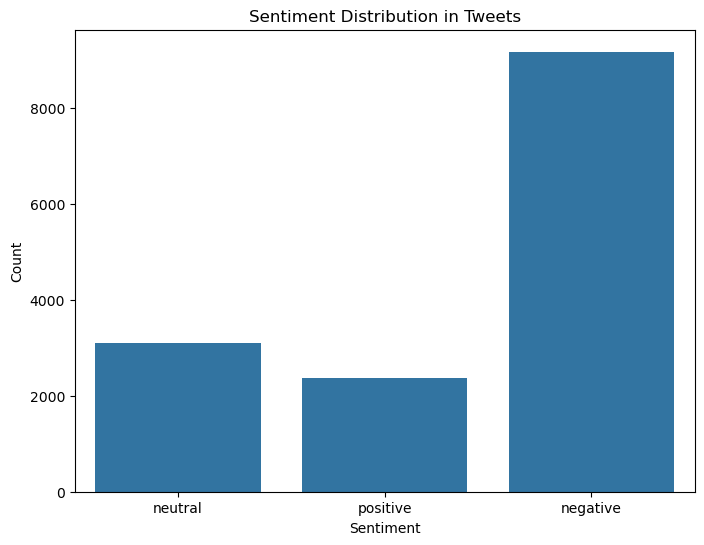

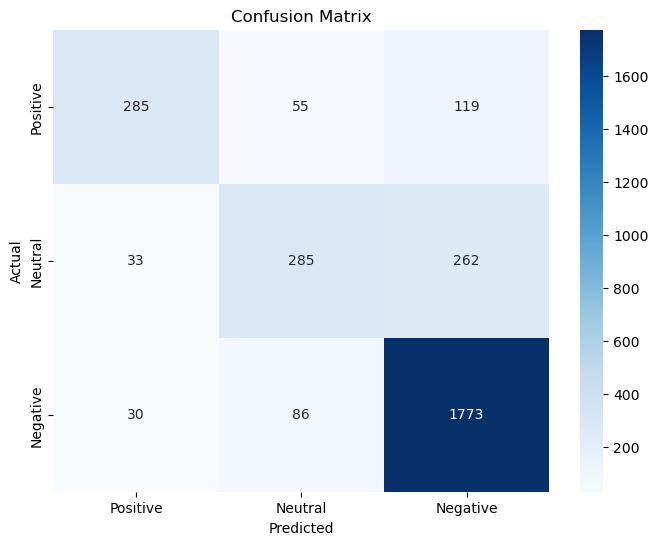


Sample prediction:
Text: I love the friendly service on this airline!
Predicted sentiment: positive


In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK data (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset (update path to your Tweets.csv)
data = pd.read_csv('Tweets.csv')
df = data[['text', 'airline_sentiment']].rename(columns={'airline_sentiment': 'sentiment'})
print("Dataset loaded:")
print(df.head())
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())

# Preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|@\w+|#\w+|[^a-zA-Z\s]', '', text)  # Remove URLs, mentions, hashtags, special chars
    tokens = word_tokenize(text)  # Tokenize
    stop_words = set(stopwords.words('english'))  # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()  # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)
print("\nPreprocessed data:")
print(df[['text', 'cleaned_text']].head())

# Split data and train model
X = df['cleaned_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Evaluate model
y_pred = model.predict(X_test_tfidf)
print("\nModel performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.savefig('sentiment_distribution.png')
plt.show()

# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'], yticklabels=['Positive', 'Neutral', 'Negative'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.show()

# Function to predict sentiment for new text
def predict_sentiment(text):
    cleaned_text = preprocess_text(text)
    text_tfidf = vectorizer.transform([cleaned_text])
    prediction = model.predict(text_tfidf)[0]
    return prediction

# Test prediction
sample_text = "I love the friendly service on this airline!"
print("\nSample prediction:")
print("Text:", sample_text)
print("Predicted sentiment:", predict_sentiment(sample_text))